# Error Control and Variable Step Sizes

**References:**

- Section 6.5 *Variable Step-Size Methods* in {cite}`Sauer`.
- Section 5.5 *Error Control and the Runge-Kutta-Fehlberg Method* in {cite}`Burden-Faires`.
- Section 7.3 in {cite}`Chenney-Kincaid`.

## The Basic ODE Initial Value Problem

We consider again the initial value problem

$$ \frac{d u}{d t} = f(t, u) \quad a \leq t \leq b, \quad u(a) = u_0 $$

We now allow the possibility that $u$ and $f$ are vector-valued as in the section
{doc}`ODE-IVP-4-system-higher-order-equations`,
but omitting the tilde notation $\tilde u$, $\tilde f$.

## Error Control by Varying the Time Step Size $h_i$

Recall the variable step-size version of Euler's method:

```{prf:algorithm}
:label: euler-variable-h

Input: $f$, $a$, $b$, $n$ <br>

$t_0 = a$
<br>
$U_0 = u_0$
<br>
$h = (b-a)/n$
<br>
for i in $[0, n)$:
<br>
$\qquad$ Choose step size $h_i$ somehow!
<br>
$\qquad$ $t_{i+1} = t_i + h_i$
<br>
$\qquad$ $U_{i+1} = U_i + h_i f(t_i, U_i)$
<br>
end
```

We now consider how to choose each step size, by estimating the error in each step,
and aiming to have error per unit time below some limit like $\epsilon/(b-a)$, so that the global error is no more than about $\epsilon$.

As usual, the theoretical error bounds like $O(h_i^2)$ for a single step of Euler's method are not enough for quantitative tasks like choosing $h_i$,
but they do motivate more practical estimates.

## A crude error estimate for Euler's Method: Richardson Extrapolation

Starting at a point (t, u(t)), we can estimate the error in Euler's method approximato at a slightly later time $t_i + h$ by using two approximations of $U(t + h)$:
- The value given by a step of Euler's method with step size $h$: call this $U^{h}$
- The value given by taking two steps of Euler's method each with step size $h/2$: call this $U_2^{h/2}$,
because it involves 2 steps of size $h/2$.

The first order accuracy of Euler's method gives $e_h = u(t+h) - U^{h} \approx 2(u(t+h) - U_2^{h/2})$,
so that

$$e_h \approx \frac{U_2^{h/2} - U^{h}}{2}$$

### Step size choice

What do we do with this error information?

The first obvious ideas are:
- Accept this step if $e_h$ is small enough, taking $h_i = h$, $t_{i+1} = t_i + h_i$, and $U_{i+1} = U^h$, but
- reject it and try again with a smaller $h$ value otherwise; maybe halving $h$; but there are more sophisticated options too.

See [Exercise 1](exercise-1).

### Error tolerance 

One simple criterion for accuracy is that the estimated error in this step be no more than some overall upper limit on the error in each time step, $T$.
That is, accept the step size $h$ if

$$|e_h| \leq T$$

### A crude approach to reducing the step size when needed

If this error tolerance is not met, we must choose a new step size $h'$, and we can predict roughly its error behavior using the known order natue of the error in Euler's method: scaling dowen to $h' = s h$, the error in a single step scales with $h^2$ (in general it scales with $h^{p+1}$ for a method of order $p$), and so to reduce the error by the needed factor $\displaystyle \frac{e_h}{T}$ one needs approximately

$$ s^2 = \frac{T}{|e_h|} $$

and so using $e_h \approx \tilde{e}_h = |U^{h/2} - U^{h}|$ suggests using

$$ s = \left( \frac{T}{|U^{h/2} - U^{h}|} \right)^{1/2} $$

However this new step size might have error that is still slightly too large, leading to a second failure.
Another is that one might get into an infinite loop of step size reduction.

So refinements of this choice must be considered.

### Increasing the step size when desirable

If we simply follow the above aproach, the step size, once reduced, will never be increased.
This could lead to great inefficiency, through using an unecessarily small step size just because at an earlier part of the time domain, accuracy required very small steps.

Thus, after a successful time step, one might consider increasing $h$ for the next step.
This could be done using exactly the above formula, but again there are risks, so again refinement of this choice must be considered.

One problem is that if the step size gets too large, the error estimate can become unreliable; another is that one might need some minimum "temporal resolution", for nice graphs and such.

Both suggest imposing an upper limit on the step size $h$.

## Another strategy for getting error estimates: two (related) Runge-Kutta methods

The recurring strategy of estimating errors by the difference of two different approximations — one expected to be far better than the other — can be used in a nice way here.
I will first illustrate with the simplest version, using Euler's Mathod and the Explicit Trapezoid Method.

Recall that the increment in Euler's Method from time $t$ to time $t+h$ is

$$K_1 = h f(t, U)$$

whereas for the Explict Trapezoid Method it is $(K_1 + K_2)/2$, as given by

$$\begin{split}
K_1 &= h f(t, U)
\\
K_2 &= h f(t+h, U + K_1)
\end{split}$$

Thus we can use the difference, $|K_1 - (K_1 + K_2)/2| = |(K_1 - K_2)/2|$ as an error estimate.
In fact to be cautious, one often drops the factor of $1/2$, so using approximation $\tilde{e}_h = |K_1 - K_2|$.

One has to be careful: this estimates the error in Euler's Method, and one has to use it that way:
using the less accurate value $K_1$ as the update.

A basic algorithm for the time step starting with $t_i, U_i$ is

```{prf:algorithm}
:label: choose-step-size-1

$K_1 \leftarrow h f(t_i, U_i)$
<br>
$K_2 \leftarrow h f(t_i + h, U_i + K_1)$
<br>
$e_h \leftarrow |K_1 - K_2|$
<br>
$s \leftarrow \sqrt{T/e_h}$
<br>
if $e_h < T$
<br>
$\quad U_{i+1} = U_i + K_1$
<br>
$\quad t_{i+1} = t_i + h$
<br>
$\quad$ Increase $h$ for the *next* time step:
<br>
$\quad h \leftarrow s h$
<br>
else: $\quad$ (not good enough: reduce $h$ and try again)
<br>
$\quad h \leftarrow s h$
<br>
$\quad$ Start again from $K_1 = \dots$
<br>
end
```

However, in practice one needs:

- An upper limit $h_{max}$ on the step size $h$, partly because error estimates become unreliable if $h$ gets too large,
and also becuase subsequent use of the results (like graphs) might need sufficiently "fine" data.

- A lower limit $h_{max}$ on $h$, to avoid infinite loops and such.

- Since we are using only an approximation $\tilde{e}_h$ of $e_h$, and out of general caution,
it is typical to include a "safety factor" of about $0.8$ or $0.9$, when computing the *next* time step: reducing the step size scale factor to $S = 0.9 \sqrt{T/e_h}$.

Incorporating these refinements:

```{prf:algorithm}
:label: choose-step-size-2

$K_1 = h f(t_i, U_i)$
<br>
$K_2 = h f(t_i+h, U_i + K_1)$
<br>
$e_{h} = |K_1 - K_2|$
<br>
$s = 0.9\sqrt{T/e_h}$
<br>
if $e_h < T$
<br>
$\quad U_{i+1} = U_i + K_1$
<br>
$\quad t_{i+1} = t_i + h$
<br>
$\quad$ Increase $h$ for the *next* time step:
<br>
$\quad h \leftarrow \min(0.9 s h, h_{max})$
<br>
else: $\quad$ (not good enough; reduce $h$ and try again)
<br>
$\quad h \leftarrow \max(0.9 s h, h_{min})$
<br>
$\quad$ Start again from $K_1 = \dots$
<br>
end
```

See [Exercise 2](exercise-2).

<a name="etmec"></a>
## The explicit trapezoid method with error control

In practice, one usually needs at least second order accuracy, and one approach to that is using computing a "candidates" for the next time step with a second order accurate Runge-Kutta method and also a third order accurate one, the latter used only to get an error estimate for the former.

Perhaps the simplest of these is based on adding error estimation to the Explicit Trapezoid Rule.
Omitting the step size adjustment for now, the main ingredients are:

```{prf:algorithm}
:label: trapezoid-step-size

$K_1 = h f(t, U)$
<br>
$K_2 = h f(t + h, U + K_1)$
<br>
(So far, as for the explicit trapezoid method)

$K_3 = h f(t + h/2, U + (K_1 + K_2)/4)$
<br>
(a midpoint approximation, using the above)

$\delta_2 = (K_1 + K_2)/2$
<br>
(The order 2 increment as for the explicit trapezoid method)

$\delta_3 = (K_1 + 4 K_3 + K_2)/6$
<br>
(An order 3 increment — note the resemblance to Simpson's Rule for integration.
This is only used to get the final error estimate below)

$e_h = |\delta_2 - \delta_3 |, \, = |K_1 -2 K_3 + K_2|/3$
```

Again, if this step is accepted, one uses the explicit trapezoid rule step: $U_{i+1} = U_i + \delta_2$.

### Step size adjustment

The scale factor $s$ for step size adjustment must be modified for a method order $p$ (with $p=2$ now):
- Changing step size by a factor $s$ will change the error $e_h$ in a single time step by a factor of about $s^{p+1}$.

- Thus, we want a new step with this rescaled error of about $s^{p+1} e_h$ roughly matching the tolerance $T$.
Equating would give $s^{p+1} e_h = T$, so $s = (T/e_h))^{1/(p+1)}$,
but as noted above, since we are using only an approximation $\tilde{e}_h$ of $e_h$
it is typical to include a "safety factor" of about $0.9$, so something like

$$s = 0.9 \left( \frac{T}{|\tilde{e}_h|} \right)^{1/(p+1)}$$

Thus for this second order accurate method, we then get

$$s = 0.9 \left( \frac{3 T}{|K_1 -2 K_3 + K_2|} \right)^{1/3}$$

**A variant: relative error control**

One final refinement: it is more common in software to impose a *relative error* bound: aiming for $|e_h/u(t)| \leq T$,
or $|e_h| \leq T|u(t)|$.
Approximating $u(t)$ by $U_i$, this changes the step size rescaling guideline to

$$s = 0.9 \left| \frac{T U_i}{\tilde{e}_h} \right|^{1/(p+1)}$$

See [Exercise 3](exercise-3)

## Fourth order accurate methods with error control: Runge-Kutta-Felberg and some newer refinements

The details involve some messy coefficients; see the references above for those.

The basic idea is to devise a fifth order accurate Runge-Kutta method such that we can also get a fourth order accurate method from the same colection of *stages* $K_i$ values.
One catch is that any such fifth order method requires six stages (not five as you might have guessed).

The first such method, still widely used, is the
[Runge-Kutta-Felberg Method](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta%E2%80%93Fehlberg_method)
published by Erwin Fehlberg in 1970:

```{prf:algorithm} RUnge-Kutta-Fehlberg
:label: rkf

$K_1 = h f(t, U)$
<br>
$K_2 = f(t + \frac{1}{4}h, U + K_1/4)$
<br>
$K_3 = f(t + \frac{3}{8} h, U + \frac{3}{32} K_1 + \frac{9}{32} K_2)$
<br>
$K_4 = f(t + \frac{12}{13} h, U + \frac{1932}{2197} K_1 - \frac{7200}{2197} K_2 + \frac{7296}{2197} K_3)$
<br>
$K_5 = f(t + h, U + \frac{439}{216} K_1 - 8  K_2 + \frac{3680}{2565} K_3  - \frac{845}{4104} K_4)$
<br>
$K_6 = f(t + \frac{1}{2}h, U - \frac{8}{27} K_1 + 2 K_2 - \frac{3544}{513} K_3 + \frac{1859}{4104} K_4 - \frac{11}{40} K_5)$
<br>
$\delta_4 = \frac{25}{216} K_1 + \frac{1408}{2565} K_3 + \frac{2197}{4104} K_4 - \frac{1}{5} K_5$
<br>
(The order 4 increment that will actually be used)

$\delta_5 = \frac{16}{135} K_1 + \frac{6656}{12825} K_3 + \frac{28561}{56430} K_4 - \frac{9}{50} K_5  + \frac{2}{55} K_6$
<br>
(The order 5 increment, used only to get the following error estimate)

$\tilde{e}_h = \frac{1}{360} K_1 - \frac{128}{4275} K_3 + \frac{2197}{75240} K_4 + \frac{1}{50} K_5  + \frac{2}{55} K_6$
```

This method is typically used with the relative error control mentioned above, and since the order is $p=4$,
the recommended step-size rescaling factor is

$$s = 0.9 \left| \frac{T U_i}{\tilde{e}_h} \right|^{1/5},
= 0.9 \left| \frac{T U_i}{\frac{1}{360} K_1 - \frac{128}{4275} K_3 + \frac{2197}{75240} K_4 + \frac{1}{50} K_5  + \frac{2}{55} K_6} \right|^{1/5},
$$


## ODE solvers in Julia package `DifferentialEquations`

Newer software often uses variants such as the
method of [Dormand–Prince method](https://en.wikipedia.org/wiki/Dormand%E2%80%93Prince_method) published in 1980
or that of Tsitouras published in 2011.

These (and many others) are available in the Julia package `DifferentialEquations` as `DP5` and `Tsit45` respectively.

### Example using package `DifferentialEquations`

To be added.

---
## Exercises

<a name="exercise-1"></a>
### Exercise 1

Write a formula for $U_h$ and $e_h$ if one starts from the point $(t_i, U_i)$, so that $(t_i + h, U^h)$ is the proposed value for the next point $(t_{i+1}, U_{i+1})$ in the approximate solution — but only if $e_h$ is small enough!

<a name="exercise-2"></a>
### Exercise 2

Implement {prf:ref}`choose-step-size-2`, and test on the two familiar examples

$$
\begin{split}
du/dt &= Ku
\\
&\text{and}
\\
du/dt &= K(\cos(t) - u) - \sin(t)
\end{split}
$$

($K=1$ is enough.)

<a name="exercise-3"></a>
### Exercise 3

Implement [the explicit trapezoid method with error control](#etmec)
as sketched out in {prf:ref}`trapezoid-step-size`,
and test on the two familiar examples

$$
\begin{split}
du/dt &= K u
\\
&\text{and}
\\
du/dt &= K(\cos(t) - u) - \sin(t)
\end{split}
$$

($K = 1$ is enough.)

#### Partial Solution to Exercise 2

In [1]:
using PyPlot
using LinearAlgebra: norm

In [2]:
import Base: round
round(x,n) = round(x,sigdigits=n);

In [3]:
function eulermethod_errorcontrol(f, a, b, u_0; errortolerance=1e-3, h_min=1e-6, h_max=0.1, steps_max=1000, demomode=false)
    steps = 0
    t_i = a
    U_i = u_0
    t = [t_i]
    U = [U_i]
    h = h_max  # Start optimistically!
    while t_i < b && steps < steps_max
        K_1 = h*f(t_i, U_i)
        K_2 = h*f(t_i + h/2, U_i + K_1/2)
        errorestimate = abs(K_1 - K_2)
        s = 0.9 * sqrt(errortolerance/errorestimate)
        if errorestimate <= errortolerance  # Success!
            t_i += h
            U_i += K_1
            append!(t, t_i)
            append!(U, U_i)
            # Adjust step size up, but not too big
            h = min(s*h, h_max)
        else  # Innacurate; reduce step size and try again
            h = max(s*h, h_min)
            if demomode
                println("t_i=$t_i: Decreasing step size to $(round(h,4)) and trying again.")
            end
        end
        # A refinement not mentioned above; the next step should not overshoot t=b:
        if t_i + h > b
            h = b - t_i
        end
        steps += 1
    end
    return (t, U)
    # Note: if the step count ran out, this does not reach t=b, but at least it is correct as far as it goes
end;

In [4]:
f(t, u) = K*u;

In [5]:
a = 1.0
b = 3.0
u_0 = 2.0
K = 1.0
u(t) = u_0*exp(K*(t-a));

t_i=1.0: Decreasing step size to 0.09 and trying again.

With error tolerance 0.01, this took 36 time steps, of average length 0.05556
The maximum absolute error is 0.8311
The maximum absolute error per time step is 0.02309
The time taken to solve was 0.1013 seconds


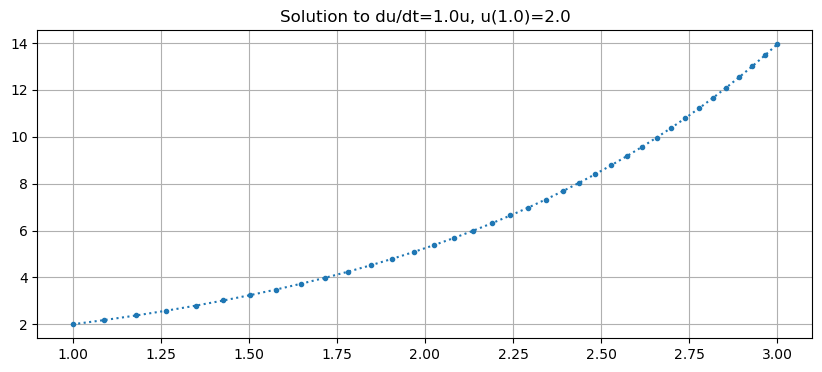

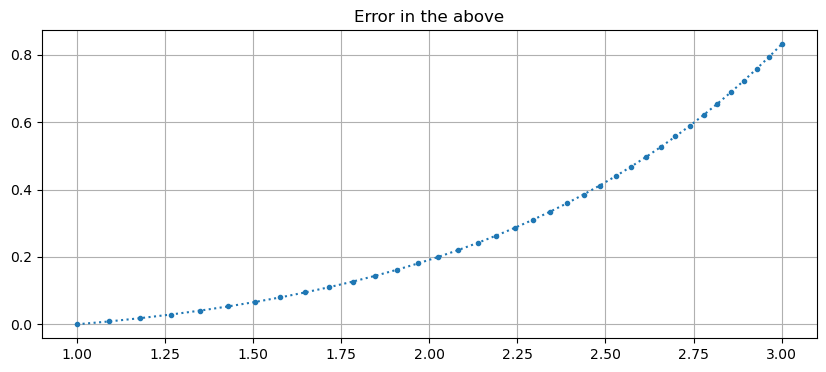

In [6]:
errortolerance = 1e-2
time_start = time()
(t, U) = eulermethod_errorcontrol(f, a, b, u_0; errortolerance=errortolerance, demomode=true)
time_end = time()
time_elapsed = time_end - time_start

steps = length(U) - 1
h_ave = (b-a)/steps
U_exact = u.(t)
U_error = U_exact - U
U_max = norm(U_error, Inf)
println()
println("With error tolerance $errortolerance, this took $steps time steps, of average length $(round(h_ave,4))")
println("The maximum absolute error is $(round(U_max,4))")
println("The maximum absolute error per time step is $(round(U_max/steps,4))")
println("The time taken to solve was $(round(time_elapsed,4)) seconds")

figure(figsize=[10,4])
title("Solution to du/dt=$(K)u, u($a)=$u_0")
plot(t, U, ".:")
grid(true)

figure(figsize=[10,4])
title("Error in the above")
plot(t, U_error, ".:")
grid(true);

t_i=1.0: Decreasing step size to 0.02846 and trying again.

With error tolerance 0.001, this took 119 time steps, of average length 0.01681
The maximum absolute error is 0.2648
The maximum absolute error per time step is 0.002225
The time taken to solve was 0.000737 seconds


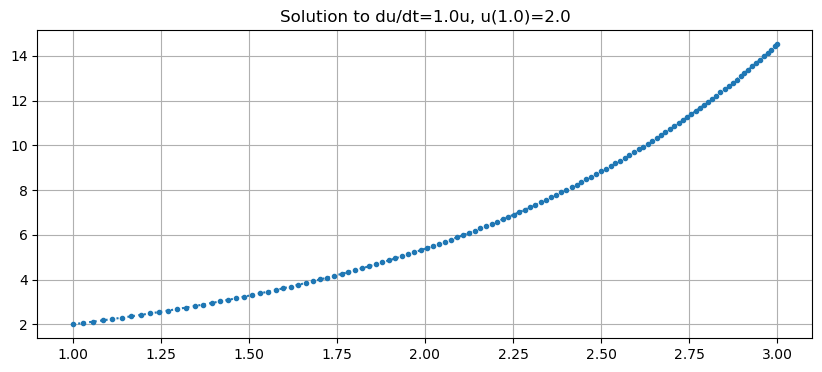

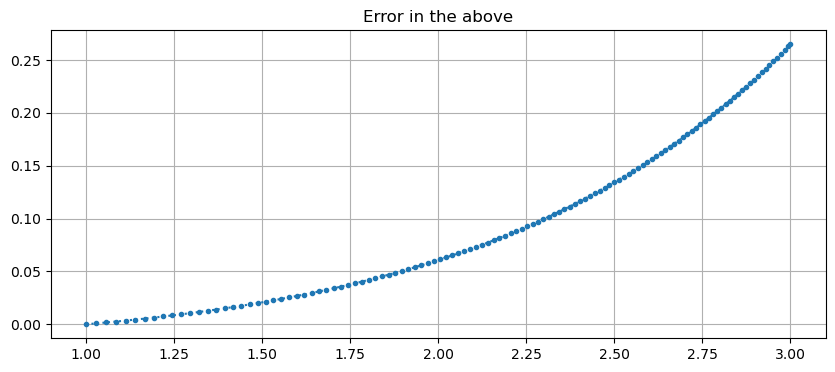

In [7]:
errortolerance = 1e-3
time_start = time()
(t, U) = eulermethod_errorcontrol(f, a, b, u_0; errortolerance=errortolerance, demomode=true)
time_end = time()
time_elapsed = time_end - time_start

steps = length(U) - 1
h_ave = (b-a)/steps
U_exact = u.(t)
U_error = U_exact - U
U_max = norm(U_error, Inf)
println()
println("With error tolerance $errortolerance, this took $steps time steps, of average length $(round(h_ave,4))")
println("The maximum absolute error is $(round(U_max,4))")
println("The maximum absolute error per time step is $(round(U_max/steps,4))")
println("The time taken to solve was $(round(time_elapsed,4)) seconds")

figure(figsize=[10,4])
title("Solution to du/dt=$(K)u, u($a)=$u_0")
plot(t, U, ".:")
grid(true)

figure(figsize=[10,4])
title("Error in the above")
plot(t, U_error, ".:")
grid(true);

t_i=1.0: Decreasing step size to 0.009 and trying again.

With error tolerance 0.0001, this took 380 time steps, of average length 0.005263
The maximum absolute error is 0.08398
The maximum absolute error per time step is 0.000221
The time taken to solve was 0.00068 seconds


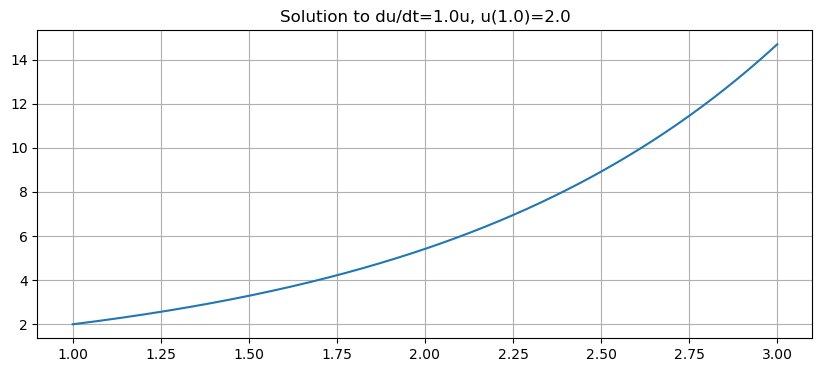

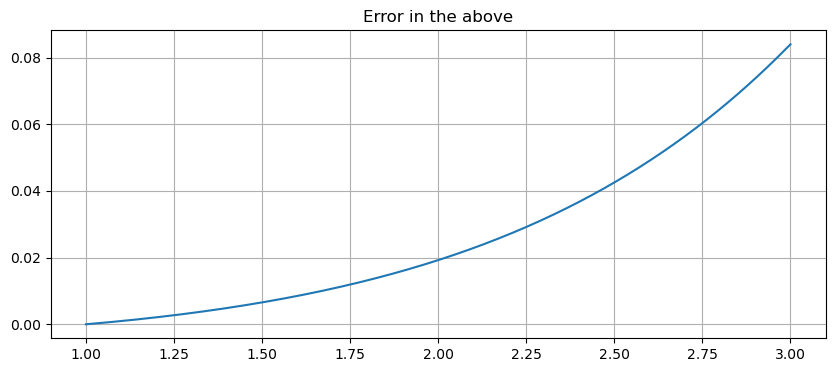

In [8]:
errortolerance = 1e-4
time_start = time()
(t, U) = eulermethod_errorcontrol(f, a, b, u_0; errortolerance=errortolerance, demomode=true)
time_end = time()
time_elapsed = time_end - time_start

steps = length(U) - 1
h_ave = (b-a)/steps
U_exact = u.(t)
U_error = U_exact - U
U_max = norm(U_error, Inf)
println()
println("With error tolerance $errortolerance, this took $steps time steps, of average length $(round(h_ave,4))")
println("The maximum absolute error is $(round(U_max,4))")
println("The maximum absolute error per time step is $(round(U_max/steps,4))")
println("The time taken to solve was $(round(time_elapsed,4)) seconds")

figure(figsize=[10,4])
title("Solution to du/dt=$(K)u, u($a)=$u_0")
plot(t, U)
grid(true)

figure(figsize=[10,4])
title("Error in the above")
plot(t, U_error)
grid(true);